In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
acc = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_2070/3899573773.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  acc = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


In [3]:
acc['CRASH DATE'] = pd.to_datetime(acc['CRASH DATE'])

In [4]:
acc = acc.sort_values(by='CRASH DATE')
acc.reset_index(drop=True);

In [7]:
acc = acc.dropna(subset=['LATITUDE', 'LONGITUDE', 'BOROUGH'])
filter1 = acc.LATITUDE >=40


acc = acc[filter1]

In [10]:
filter2 = (acc.LONGITUDE <= -72) & (acc.LONGITUDE >= -75)

acc = acc[filter2]

In [100]:
acc.to_csv('CrashData.csv')

In [53]:
cols = ['NUMBER OF PERSONS INJURED', 'CONTRIBUTING FACTOR VEHICLE 1']
causes = acc[cols].groupby('CONTRIBUTING FACTOR VEHICLE 1', as_index=False).count().sort_values(by='NUMBER OF PERSONS INJURED', ascending=False).reset_index(drop=True)

In [55]:
causes.head(10)

,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS INJURED
0,Unspecified,528706
1,Driver Inattention/Distraction,265795
2,Failure to Yield Right-of-Way,88166
3,Backing Unsafely,58685
4,Following Too Closely,44842
5,Other Vehicular,44502
6,Passing Too Closely,35628
7,Passing or Lane Usage Improper,34291
8,Turning Improperly,32985
9,Fatigued/Drowsy,25621


In [12]:
acc['CRASH TIME'] = pd.to_datetime(acc['CRASH TIME'], errors='coerce')
acc['hour'] = acc['CRASH TIME'].dt.hour

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_2070/3680854242.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acc['CRASH TIME'] = pd.to_datetime(acc['CRASH TIME'], errors='coerce')


In [13]:
hourly = acc[['hour', 'CRASH TIME']].groupby('hour', as_index=False).count().reset_index(drop=True)
import seaborn as sns

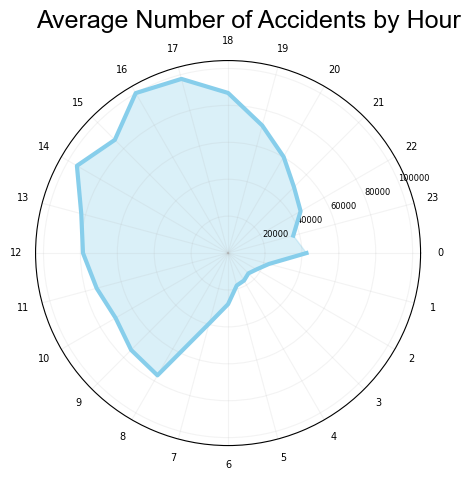

In [127]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Set theta (angle) and r (radius) values
theta = (-hourly['hour'] * (2 * np.pi / 24))
r = hourly['CRASH TIME']

# Plot the radial plot
ax.plot(theta, r, color='skyblue', linewidth=3)

# Set the radial ticks (hours)
hour_ticks = np.linspace(2*np.pi, 0, 24, endpoint=False)
ax.set_xticks(hour_ticks)
ax.set_xticklabels([str(hour) for hour in range(24)], fontsize=7)

ax.tick_params(axis='y', labelsize=6)
# Set the radial gridlines
ax.grid(True, alpha=0.15)

# Fill the area under the line
ax.fill(theta, r, color='skyblue', alpha=0.3)

# Set the title
plt.title('Average Number of Accidents by Hour',fontdict={'fontname': 'Arial', 'fontsize': 18}, loc='left')

plt.savefig('Hourly.png', dpi=400, format='png')

In [98]:
causes = acc[['CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED']].groupby('CONTRIBUTING FACTOR VEHICLE 1', 
                                                                                     as_index=False).sum().sort_values(by='NUMBER OF PERSONS INJURED', 
                                                                                                                         ascending=False).reset_index(drop=True)

In [102]:
causes

,CONTRIBUTING FACTOR VEHICLE 1,NUMBER OF PERSONS INJURED
1,Driver Inattention/Distraction,83950.0
2,Failure to Yield Right-of-Way,46159.0
3,Traffic Control Disregarded,17008.0
4,Following Too Closely,15029.0
5,Other Vehicular,9827.0
6,Unsafe Speed,9258.0
7,Turning Improperly,7177.0
8,Backing Unsafely,7080.0
9,Alcohol Involvement,6786.0
10,Passing or Lane Usage Improper,6592.0


In [100]:
causes.drop(causes.index[0], inplace=True)

In [101]:
causes = causes.head(10)

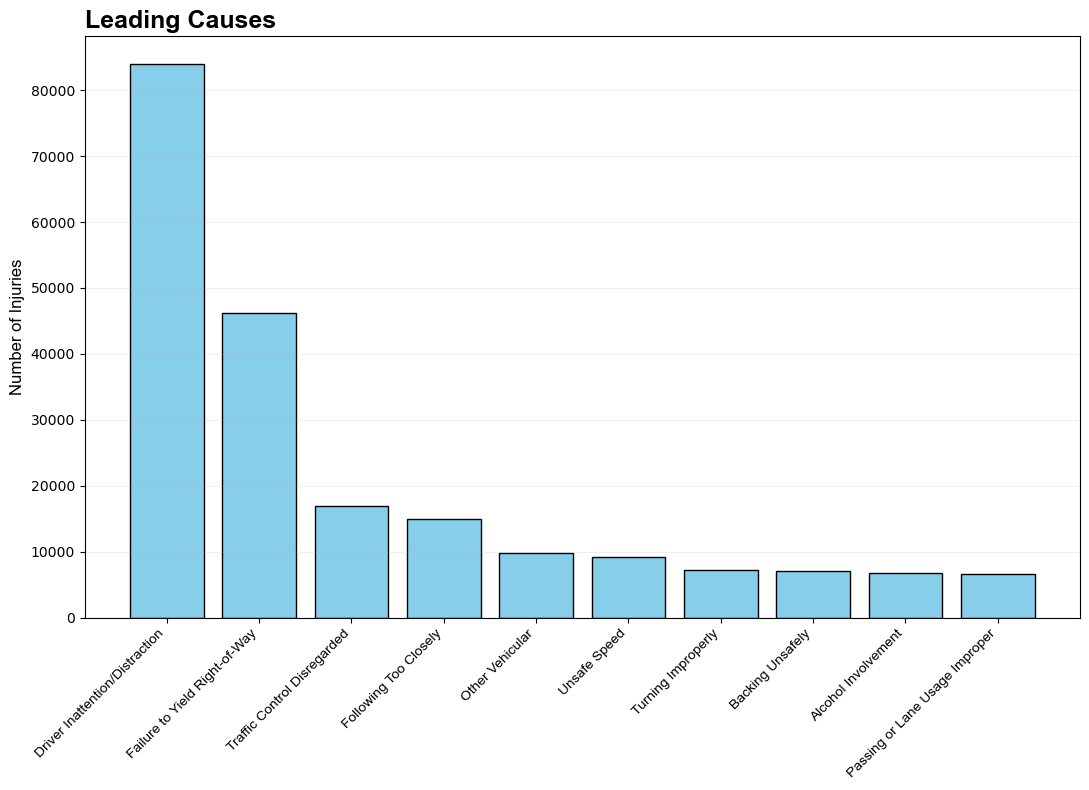

In [125]:
plt.figure(figsize=(11, 8))
plt.bar('CONTRIBUTING FACTOR VEHICLE 1', height='NUMBER OF PERSONS INJURED', data=causes, edgecolor='black', color='skyblue')
plt.grid(alpha=0.2, axis='y')
plt.xticks(rotation=45, ha='right', fontname='Arial',fontsize=10)
plt.title('Leading Causes', fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'}, loc='left')
plt.ylabel('Number of Injuries', fontdict={'fontname': 'Arial', 'fontsize': 12})
plt.tight_layout()
plt.savefig('Leading Causes.png', dpi=400, format='png')